# 数据读取

In [24]:
import pandas as pd
import numpy as np
import re

tweet = pd.read_csv(r'/Users/kejinglin/Desktop/personal/mydata/tweet.csv',encoding='utf-8')
tweet.head(5)

,u_nickname,u_url,m_content,m_content_url,m_content_id,m_images,m_videos,r_comment_num,g_publish_time,r_like_num,r_trans_num,verified,u_id,u_desc,u_fans,u_follow,u_login_time,u_area
0,Michael Johns,https://twitter.com/michaeljohns,"""...the Chinese government deliberately covere...",NaN,1256623049652277254,NaN,NaN,53,2020-05-03 00:34:16,449,409,1,14828860,National Tea Party movement co-founder and lea...,196393,112295,2008-05-19 13:06:21,"New Jersey, USA"
1,Daily Caller,https://twitter.com/DailyCaller,"""70% of the active ingredients in our pharmace...",NaN,1331432568869318660,['http://pbs.twimg.com/amplify_video_thumb/133...,https://twitter.com/DailyCaller/status/1331432...,17,2020-11-25 11:00:35,510,156,1,39308549,The journalists who love America.,736466,7550,2009-05-12 02:31:37,"Washington, DC"
2,The White House 45 Archived,https://twitter.com/WhiteHouse45,"""75 years after the end of World War II and th...",NaN,1308424389973680128,['http://pbs.twimg.com/amplify_video_thumb/130...,https://twitter.com/WhiteHouse/status/13084243...,616,2020-09-22 23:14:18,3661,963,1,822215673812119553,This is an archive of a Trump Administration a...,26490485,11,2017-01-20 06:54:27,"Washington, D.C."
3,Senator John Cornyn,https://twitter.com/JohnCornyn,"""A University of Southampton study suggests th...",NaN,1247121007749607429,NaN,NaN,231,2020-04-06 19:18:47,509,218,1,13218102,"Mainly news I find interesting, pics, and opin...",294161,11996,2008-02-08 03:52:55,"Austin, Texas"
4,Paul Joseph Watson,https://twitter.com/PrisonPlanet,"""A study published in March indicated that if ...",NaN,1240429794057236483,NaN,NaN,224,2020-03-19 08:08:03,11594,3385,1,18643437,"""Watson is a brilliant polemicist."" The Specta...",1108941,770,2009-01-06 04:04:23,London


In [114]:
tweet.describe()

,m_content_url,m_content_id,r_comment_num,r_like_num,r_trans_num,verified,u_id,u_fans,u_follow
count,0.0,1.256500e+04,12565.000000,1.256500e+04,12565.000000,12565.000000,1.256500e+04,1.256500e+04,12565.000000
mean,NaN,1.280427e+18,340.237565,3.700856e+03,1132.028492,0.633585,1.742103e+17,3.313911e+06,6325.078552
std,NaN,4.228051e+16,1864.896892,2.155075e+04,5007.933625,0.481844,3.878401e+17,9.788670e+06,24312.838256
min,NaN,2.681472e+17,0.000000,0.000000e+00,0.000000,0.000000,1.200000e+01,1.000000e+00,0.000000
25%,NaN,1.245029e+18,25.000000,3.800000e+02,131.000000,0.000000,2.652095e+07,3.995800e+04,396.000000
50%,NaN,1.273788e+18,61.000000,7.980000e+02,313.000000,1.000000,2.439839e+08,2.349330e+05,1092.000000
75%,NaN,1.313898e+18,175.000000,2.033000e+03,811.000000,1.000000,2.490891e+09,1.248639e+06,2886.000000
max,NaN,1.360728e+18,84781.000000,1.250861e+06,264973.000000,1.000000,1.350151e+18,1.293520e+08,770817.000000


# 推文筛选

In [115]:
#去除官媒
list=['Archived','News','NEWS','news','Room','BNN','NTD','Time','Press','Office','Post','Daily','Department','The','Newsroom','CNN','TIME','BBC','CBC','CBN','CNA','CNBC','FBI','Global','TV','NBC','NCSC','NCDC','Republic','Reuters','The Hindu','ABC','The Economist','Foundation','International','NASA','TikTok','Twitter','Guardian','Huawei','Digital','CDC','YouTube']
for i in list:
    tweet=tweet[~tweet['u_nickname'].str.contains(i,na=False)]

In [116]:
tweet=tweet[tweet['r_like_num'] > 100]

In [117]:
tweet=tweet[tweet['r_comment_num'] > 100]

In [118]:
tweet=tweet[tweet['r_trans_num'] > 100]
tweet

,u_nickname,u_url,m_content,m_content_url,m_content_id,m_images,m_videos,r_comment_num,g_publish_time,r_like_num,r_trans_num,verified,u_id,u_desc,u_fans,u_follow,u_login_time,u_area
3,Senator John Cornyn,https://twitter.com/JohnCornyn,"""A University of Southampton study suggests th...",NaN,1247121007749607429,NaN,NaN,231,2020-04-06 19:18:47,509,218,1,13218102,"Mainly news I find interesting, pics, and opin...",294161,11996,2008-02-08 03:52:55,"Austin, Texas"
4,Paul Joseph Watson,https://twitter.com/PrisonPlanet,"""A study published in March indicated that if ...",NaN,1240429794057236483,NaN,NaN,224,2020-03-19 08:08:03,11594,3385,1,18643437,"""Watson is a brilliant polemicist."" The Specta...",1108941,770,2009-01-06 04:04:23,London
11,Brian Stelter,https://twitter.com/brianstelter,"""America has had the best response to coronavi...",NaN,1239359123587846144,NaN,NaN,938,2020-03-16 09:13:35,1455,184,1,14515799,Anchor of @ReliableSources and @CNN's chief me...,781737,7075,2008-04-25 02:41:42,New York City
16,Laurie Garrett,https://twitter.com/Laurie_Garrett,"""As many as 14% of recovered #coronavirus pati...",NaN,1243328270059405312,NaN,NaN,127,2020-03-27 08:05:34,970,829,1,299273962,Former Sr Fellow @CFR_org. Recipient of Pulitz...,237918,1818,2011-05-16 04:00:40,"New York, NY"
19,Tom Fitton,https://twitter.com/TomFitton,"""BIG GUY"" Biden implicated in RICO-style deal ...",NaN,1319789796185772033,['http://pbs.twimg.com/media/ElDVv-aWkAAE1d3.j...,NaN,435,2020-10-24 07:56:22,3789,1580,1,18266688,"President, Judicial Watch. (These are my perso...",1184751,3225,2008-12-20 22:32:44,"Washington, DC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,Katie S. Phang,https://twitter.com/KatiePhang,➡️ Kansas official “suggested this week that t...,NaN,1240996533430104071,NaN,NaN,2299,2020-03-20 21:40:04,5606,3034,1,1286161147,@NBC & @MSNBC Legal Contributor | Trial Lawyer...,158077,1085,2013-03-21 22:45:07,NaN
12553,Katie S. Phang,https://twitter.com/KatiePhang,"➡️ “In a series of tweets on March 12, Caputo ...",NaN,1253396978991599616,NaN,NaN,243,2020-04-24 02:55:01,1396,860,1,1286161147,@NBC & @MSNBC Legal Contributor | Trial Lawyer...,158077,1085,2013-03-21 22:45:07,NaN
12556,Joshua Wong 黃之鋒,https://twitter.com/joshuawongcf,"【Who is responsible for #COVID19, China or US?...",NaN,1247907235012866048,['http://pbs.twimg.com/ext_tw_video_thumb/1247...,https://twitter.com/joshuawongcf/status/124790...,214,2020-04-08 23:20:44,2509,1614,1,18798768,"* CURRENTLY IN JAIL, ACCOUNT MANAGED BY FRIEND...",736992,1225,2009-01-09 19:23:36,Hong Kong
12561,鄭若舜Yorkson,https://twitter.com/4OONHMEmTtmuKGP,楼下保安员说：‘美国大兵，穿山甲，果子狸，蝙蝠，三文魚都讲过了，这次是陨石。但是，陨石进入大...,NaN,1304666090870505472,['http://pbs.twimg.com/media/Ehsa5GdU4AAG2Y_.j...,NaN,101,2020-09-12 14:20:10,743,247,0,707974414290128897,一個已婚生子的80後（畢業於Kung Lee College),41183,1880,2016-03-11 01:00:28,"North District, Hong Kong"


In [119]:
#去除注册时间晚于2020.01.01的
import datetime
tweet['u_login_time'] = pd.to_datetime(tweet['u_login_time']) 
tweet['u_login_time']

3       2008-02-08 03:52:55
4       2009-01-06 04:04:23
11      2008-04-25 02:41:42
16      2011-05-16 04:00:40
19      2008-12-20 22:32:44
                ...        
12552   2013-03-21 22:45:07
12553   2013-03-21 22:45:07
12556   2009-01-09 19:23:36
12561   2016-03-11 01:00:28
12564   2018-08-10 11:50:27
Name: u_login_time, Length: 3457, dtype: datetime64[ns]

In [120]:
someday=pd.to_datetime('2020-01-01')
tweet=tweet[~(tweet['u_login_time'] >= someday)]
tweet

,u_nickname,u_url,m_content,m_content_url,m_content_id,m_images,m_videos,r_comment_num,g_publish_time,r_like_num,r_trans_num,verified,u_id,u_desc,u_fans,u_follow,u_login_time,u_area
3,Senator John Cornyn,https://twitter.com/JohnCornyn,"""A University of Southampton study suggests th...",NaN,1247121007749607429,NaN,NaN,231,2020-04-06 19:18:47,509,218,1,13218102,"Mainly news I find interesting, pics, and opin...",294161,11996,2008-02-08 03:52:55,"Austin, Texas"
4,Paul Joseph Watson,https://twitter.com/PrisonPlanet,"""A study published in March indicated that if ...",NaN,1240429794057236483,NaN,NaN,224,2020-03-19 08:08:03,11594,3385,1,18643437,"""Watson is a brilliant polemicist."" The Specta...",1108941,770,2009-01-06 04:04:23,London
11,Brian Stelter,https://twitter.com/brianstelter,"""America has had the best response to coronavi...",NaN,1239359123587846144,NaN,NaN,938,2020-03-16 09:13:35,1455,184,1,14515799,Anchor of @ReliableSources and @CNN's chief me...,781737,7075,2008-04-25 02:41:42,New York City
16,Laurie Garrett,https://twitter.com/Laurie_Garrett,"""As many as 14% of recovered #coronavirus pati...",NaN,1243328270059405312,NaN,NaN,127,2020-03-27 08:05:34,970,829,1,299273962,Former Sr Fellow @CFR_org. Recipient of Pulitz...,237918,1818,2011-05-16 04:00:40,"New York, NY"
19,Tom Fitton,https://twitter.com/TomFitton,"""BIG GUY"" Biden implicated in RICO-style deal ...",NaN,1319789796185772033,['http://pbs.twimg.com/media/ElDVv-aWkAAE1d3.j...,NaN,435,2020-10-24 07:56:22,3789,1580,1,18266688,"President, Judicial Watch. (These are my perso...",1184751,3225,2008-12-20 22:32:44,"Washington, DC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,Katie S. Phang,https://twitter.com/KatiePhang,➡️ Kansas official “suggested this week that t...,NaN,1240996533430104071,NaN,NaN,2299,2020-03-20 21:40:04,5606,3034,1,1286161147,@NBC & @MSNBC Legal Contributor | Trial Lawyer...,158077,1085,2013-03-21 22:45:07,NaN
12553,Katie S. Phang,https://twitter.com/KatiePhang,"➡️ “In a series of tweets on March 12, Caputo ...",NaN,1253396978991599616,NaN,NaN,243,2020-04-24 02:55:01,1396,860,1,1286161147,@NBC & @MSNBC Legal Contributor | Trial Lawyer...,158077,1085,2013-03-21 22:45:07,NaN
12556,Joshua Wong 黃之鋒,https://twitter.com/joshuawongcf,"【Who is responsible for #COVID19, China or US?...",NaN,1247907235012866048,['http://pbs.twimg.com/ext_tw_video_thumb/1247...,https://twitter.com/joshuawongcf/status/124790...,214,2020-04-08 23:20:44,2509,1614,1,18798768,"* CURRENTLY IN JAIL, ACCOUNT MANAGED BY FRIEND...",736992,1225,2009-01-09 19:23:36,Hong Kong
12561,鄭若舜Yorkson,https://twitter.com/4OONHMEmTtmuKGP,楼下保安员说：‘美国大兵，穿山甲，果子狸，蝙蝠，三文魚都讲过了，这次是陨石。但是，陨石进入大...,NaN,1304666090870505472,['http://pbs.twimg.com/media/Ehsa5GdU4AAG2Y_.j...,NaN,101,2020-09-12 14:20:10,743,247,0,707974414290128897,一個已婚生子的80後（畢業於Kung Lee College),41183,1880,2016-03-11 01:00:28,"North District, Hong Kong"


In [121]:
import os
tweet['m_content_id'] = tweet.apply(lambda x: '%d' % (x['m_content_id']), axis=1).astype(str)
tweet.to_excel('/Users/kejinglin/Desktop/personal/mydata/tweet_clean.xlsx',encoding='utf-8') 
tweet.to_csv('/Users/kejinglin/Desktop/personal/mydata/tweet_clean.csv',encoding='utf-8') 

<ipython-input-121-10f8af4eaaac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['m_content_id'] = tweet.apply(lambda x: '%d' % (x['m_content_id']), axis=1).astype(str)


# 数据预处理

In [68]:
tweet=pd.read_csv(r'/Users/kejinglin/Desktop/personal/mydata/tweet_clean.csv',encoding='latin-1')
tweet

,u_nickname,u_url,m_content,m_content_url,m_content_id,m_images,m_videos,r_comment_num,g_publish_time,r_like_num,r_trans_num,verified,u_id,u_desc,u_fans,u_follow,u_login_time,u_area
0,Senator John Cornyn,https://twitter.com/JohnCornyn,"""A University of Southampton study suggests th...",NaN,1247121007749607429,NaN,NaN,231,2020-04-06 19:18:47,509,218,1,1.321810e+07,"Mainly news I find interesting, pics, and opin...",294161,11996,2008-02-08 03:52:55,"Austin, Texas"
1,Paul Joseph Watson,https://twitter.com/PrisonPlanet,"""A study published in March indicated that if ...",NaN,1240429794057236483,NaN,NaN,224,2020-03-19 08:08:03,11594,3385,1,1.864344e+07,"""Watson is a brilliant polemicist."" The Specta...",1108941,770,2009-01-06 04:04:23,London
2,Brian Stelter,https://twitter.com/brianstelter,"""America has had the best response to coronavi...",NaN,1239359123587846144,NaN,NaN,938,2020-03-16 09:13:35,1455,184,1,1.451580e+07,Anchor of @ReliableSources and @CNN's chief me...,781737,7075,2008-04-25 02:41:42,New York City
3,Laurie Garrett,https://twitter.com/Laurie_Garrett,"""As many as 14% of recovered #coronavirus pati...",NaN,1243328270059405312,NaN,NaN,127,2020-03-27 08:05:34,970,829,1,2.992740e+08,Former Sr Fellow @CFR_org. Recipient of Pulitz...,237918,1818,2011-05-16 04:00:40,"New York, NY"
4,Tom Fitton,https://twitter.com/TomFitton,"""BIG GUY"" Biden implicated in RICO-style deal ...",NaN,1319789796185772033,['http://pbs.twimg.com/media/ElDVv-aWkAAE1d3.j...,NaN,435,2020-10-24 07:56:22,3789,1580,1,1.826669e+07,"President, Judicial Watch. (These are my perso...",1184751,3225,2008-12-20 22:32:44,"Washington, DC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,Sen. Marsha Blackburn,https://twitter.com/MarshaBlackburn,_@realDonaldTrump banned \ninternational fligh...,NaN,1255646215284428800,NaN,NaN,113,2020-04-30 07:52:41,326,139,1,2.781456e+08,I am honored to serve the people of Tennessee.,289154,2184,2011-04-07 02:05:33,"Brentwood, TN"
3356,Ms.F,https://twitter.com/IamMsFF,"__Warning, a frighteningly video. \nThis is a ...",NaN,1220302458540347393,['http://pbs.twimg.com/ext_tw_video_thumb/1220...,https://twitter.com/IamMsFF/status/12203024585...,155,2020-01-23 19:09:12,680,786,0,2.299902e+09,"Stand with Hongkong,\n",2808,1042,2014-01-19 23:45:09,World
3357,°Í¶ª²Ý Badiucao,https://twitter.com/badiucao,__graphic__\nbelieved that this video was film...,NaN,1221107818595381250,['http://pbs.twimg.com/ext_tw_video_thumb/1221...,https://twitter.com/badiucao/status/1221107818...,127,2020-01-26 00:29:25,1816,1569,1,2.676953e+08,Chinese-Aussie artist hunted by ChineseGov/Car...,74063,13500,2011-03-17 19:22:49,NaN
3358,Katie S. Phang,https://twitter.com/KatiePhang,"__ ¡°In a series of tweets on March 12, Caputo...",NaN,1253396978991599616,NaN,NaN,243,2020-04-24 02:55:01,1396,860,1,1.286161e+09,@NBC & @MSNBC Legal Contributor | Trial Lawyer...,158077,1085,2013-03-21 22:45:07,NaN


In [56]:
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # images
import numpy as np #numpy
import seaborn as sns
import tensorflow.compat.v2 as tf #use tensorflow v2 as a main 
import tensorflow.keras as keras # required for high level applications
from sklearn.model_selection import train_test_split # split for validation sets
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import normalize # normalization of the matrix
import scipy
import pandas as pd
import unicodedata, re, string
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import itertools

In [57]:
def remove_users_http(word):
    """Remove non-ASCII characters from list of tokenized words"""
    word = re.sub(r'http\S+', '', word)
    word = re.sub(r'@\w+', '', word)
    word = re.sub(r'#\w+', '', word)
    return word

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = remove_stopwords(words)
    return words

def form_sentence(tweet):
    tweet = remove_users_http(tweet)
    tweet_blob = TextBlob(tweet)
    return tweet_blob.words

In [69]:
tweet['clean_content'] = tweet['m_content'].apply(form_sentence)

In [70]:
tweet['clean_content'] = tweet['clean_content'].apply(normalize)

In [72]:
def fix_nt(words):
    st_res = []
    for i in range(0, len(words) - 1):
        if words[i+1] == "n't" or words[i+1] == "nt":
            st_res.append(words[i]+("n't"))
        else:
            if words[i] != "n't" and words[i] != "nt":
                st_res.append(words[i])
    return st_res

tweet['clean_content'] = tweet['clean_content'].apply(fix_nt)

In [73]:
tweet.head()

,u_nickname,u_url,m_content,m_content_url,m_content_id,m_images,m_videos,r_comment_num,g_publish_time,r_like_num,r_trans_num,verified,u_id,u_desc,u_fans,u_follow,u_login_time,u_area,clean_content
0,Senator John Cornyn,https://twitter.com/JohnCornyn,"""A University of Southampton study suggests th...",NaN,1247121007749607429,NaN,NaN,231,2020-04-06 19:18:47,509,218,1,13218102.0,"Mainly news I find interesting, pics, and opin...",294161,11996,2008-02-08 03:52:55,"Austin, Texas","[university, southampton, study, suggests, num..."
1,Paul Joseph Watson,https://twitter.com/PrisonPlanet,"""A study published in March indicated that if ...",NaN,1240429794057236483,NaN,NaN,224,2020-03-19 08:08:03,11594,3385,1,18643437.0,"""Watson is a brilliant polemicist."" The Specta...",1108941,770,2009-01-06 04:04:23,London,"[study, published, march, indicated, chinese, ..."
2,Brian Stelter,https://twitter.com/brianstelter,"""America has had the best response to coronavi...",NaN,1239359123587846144,NaN,NaN,938,2020-03-16 09:13:35,1455,184,1,14515799.0,Anchor of @ReliableSources and @CNN's chief me...,781737,7075,2008-04-25 02:41:42,New York City,"[america, best, response, coronavirus, world]"
3,Laurie Garrett,https://twitter.com/Laurie_Garrett,"""As many as 14% of recovered #coronavirus pati...",NaN,1243328270059405312,NaN,NaN,127,2020-03-27 08:05:34,970,829,1,299273962.0,Former Sr Fellow @CFR_org. Recipient of Pulitz...,237918,1818,2011-05-16 04:00:40,"New York, NY","[many, recovered, patients, china, tested, pos..."
4,Tom Fitton,https://twitter.com/TomFitton,"""BIG GUY"" Biden implicated in RICO-style deal ...",NaN,1319789796185772033,['http://pbs.twimg.com/media/ElDVv-aWkAAE1d3.j...,NaN,435,2020-10-24 07:56:22,3789,1580,1,18266688.0,"President, Judicial Watch. (These are my perso...",1184751,3225,2008-12-20 22:32:44,"Washington, DC","[big, guy, biden, implicated, ricostyle, deal,..."


In [74]:
tweet['clean_content'] = tweet['clean_content'].apply(lambda x: " ".join(x))
tweet['clean_content'] 

0       university southampton study suggests number c...
1       study published march indicated chinese author...
2                 america best response coronavirus world
3       many recovered patients china tested positive ...
4       big guy biden implicated ricostyle deal wchine...
                              ...                        
3355    banned international flights hotspots january ...
3356    warning frighteningly video catastrophe humani...
3357    graphic believed video filmed hospital city lo...
3358    series tweets march caputo responded baseless ...
3359    responsible china us perspectiveujoshua came t...
Name: clean_content, Length: 3360, dtype: object

In [75]:
clean_content=tweet['clean_content']
clean_content.to_csv('/Users/kejinglin/Desktop/personal/mydata/clean_content.csv')

# 词频/词云

In [17]:
all_words=[]
for i in tweet['clean_content']:
    all_words.extend(i)

dist = nltk.FreqDist(all_words)
dist.most_common(50)

[('china', 3267),
 ('coronavirus', 1078),
 ('virus', 934),
 ('covid', 733),
 ('trump', 631),
 ('amp', 581),
 ('us', 545),
 ('chinese', 451),
 ('world', 386),
 ('people', 356),
 ('wuhan', 281),
 ('cases', 280),
 ('president', 258),
 ('new', 252),
 ('pandemic', 227),
 ('communist', 223),
 ('says', 218),
 ('spread', 213),
 ('one', 163),
 ('deaths', 163),
 ('global', 156),
 ('outbreak', 154),
 ('health', 153),
 ('must', 152),
 ('travel', 148),
 ('time', 146),
 ('biden', 143),
 ('americans', 143),
 ('government', 142),
 ('country', 138),
 ('first', 138),
 ('america', 137),
 ('like', 135),
 ('american', 135),
 ('media', 132),
 ('india', 132),
 ('would', 119),
 ('italy', 118),
 ('response', 115),
 ('stop', 114),
 ('back', 114),
 ('racist', 109),
 ('could', 108),
 ('said', 106),
 ('today', 106),
 ('countries', 104),
 ('medical', 102),
 ('million', 102),
 ('vaccine', 101),
 ('get', 100)]

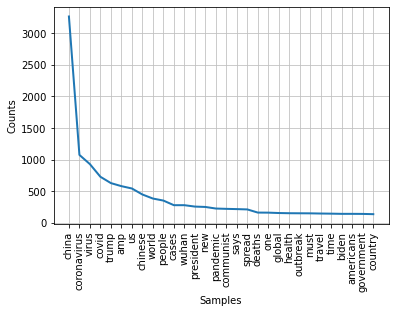

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [75]:
dist.plot(30)

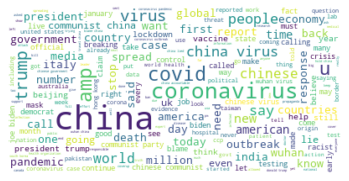

In [76]:
from wordcloud import WordCloud
final_text ='/'.join(all_words)
wordcloud = WordCloud(background_color="white", max_font_size=40).generate(final_text)
# 步骤4-1：创建一个图表画布
plt.figure()
# 步骤4-2：设置图片
plt.imshow(wordcloud, interpolation="bilinear")
# 步骤4-3：取消图表x、y轴
plt.axis("off")
# 显示图片
plt.show()

# 主题

抽样为20时的perplexity
the info of this ldamodel: 

num of topics: 1
模型困惑度为 : 1891.9059303007393
the info of this ldamodel: 

num of topics: 2
模型困惑度为 : 1749.3830550758896
the info of this ldamodel: 

num of topics: 3
模型困惑度为 : 1588.793623328589
the info of this ldamodel: 

num of topics: 4
模型困惑度为 : 1505.453515049014
the info of this ldamodel: 

num of topics: 5
模型困惑度为 : 1380.9212610363163
the info of this ldamodel: 

num of topics: 6
模型困惑度为 : 1323.1821765006694
the info of this ldamodel: 

num of topics: 7
模型困惑度为 : 1285.9925892892925
the info of this ldamodel: 

num of topics: 8
模型困惑度为 : 1231.5803839021455
the info of this ldamodel: 

num of topics: 9
模型困惑度为 : 1185.8410829195407
the info of this ldamodel: 

num of topics: 10
模型困惑度为 : 1179.7511301028076
the info of this ldamodel: 

num of topics: 11
模型困惑度为 : 1163.6979463867337
the info of this ldamodel: 

num of topics: 12
模型困惑度为 : 1112.5739746019672
the info of this ldamodel: 

num of topics: 13
模型困惑度为 : 1092.7488393229103
the info of this l

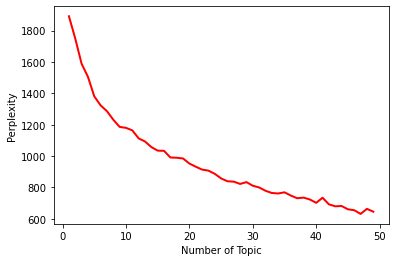

In [15]:
#主题数选择
from gensim import corpora, models
import math

import matplotlib.pyplot as plt


def ldamodel(num_topics, pwd):
    cop = open(pwd, 'r', encoding='UTF-8')
 
    train = []
    for line in cop.readlines():
        line = [word.strip() for word in line.split(',')]
        train.append(line) 
         
    dictionary = corpora.Dictionary(train)
    corpus = [dictionary.doc2bow(text) for text in train] 
    
    corpora.MmCorpus.serialize('corpus.mm', corpus)
    lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,
                          num_topics=num_topics)  
 
    topic_list = lda.print_topics(num_topics, 10)

    return lda, dictionary


def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    print('the info of this ldamodel: \n')
    print('num of topics: %s' % num_topics)
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] 
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)  
    doc_topics_ist = []  
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0  
        doc = testset[i]
        doc_word_num = 0  
        for word_id, num in dict(doc).items():
            prob_word = 0.0  
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                # cal p(w) : p(w) = sumz(p(z)*p(w|z))
                prob_topic = doc_topics_ist[i][topic_id][1]
                prob_topic_word = topic_word_list[topic_id][word]
                prob_word += prob_topic * prob_topic_word
            prob_doc += math.log(prob_word)  # p(d) = sum(log(p(w)))
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum / testset_word_num)  # perplexity = exp(-sum(p(d)/sum(Nd))
    print("模型困惑度为 : %s" % prep)
    return prep

# 主题数与困惑度的折线图
def graph_draw(topic, perplexity):  
    x = topic
    y = perplexity
    plt.plot(x, y, color="red", linewidth=2)
    plt.xlabel("Number of Topic")
    plt.ylabel("Perplexity")
    plt.savefig("Perplexity-Topics")
    plt.show()
    
if __name__ == '__main__':
    # 要求：语料需要多篇文档合成一篇，任意几篇合成一篇即可
    # 测试时单篇文档提取关键词有问题，未知bug，未解决
    pwd = '/Users/kejinglin/Desktop/personal/mydata/clean_content.csv'
    # 多少文档中抽取一篇
    for i in range(1000,1001,1): 
        print("抽样为"+str(i)+"时的perplexity")
        a=range(1,50,1) # 主题个数
        p=[]
        for num_topics in a:
            lda, dictionary = ldamodel(num_topics, pwd)
            corpus = corpora.MmCorpus('corpus.mm')
            testset = []
            for c in range(int(corpus.num_docs/i)):
                testset.append(corpus[c*i])
            prep = perplexity(lda, testset, dictionary, len(dictionary.keys()), num_topics)
            p.append(prep)
        graph_draw(a,p)


INFO:lda:n_documents: 58074
INFO:lda:vocab_size: 9250
INFO:lda:n_words: 57913
INFO:lda:n_topics: 7
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -612042
INFO:lda:<10> log likelihood: -518304
INFO:lda:<20> log likelihood: -507856
INFO:lda:<30> log likelihood: -502909
INFO:lda:<40> log likelihood: -500028
INFO:lda:<50> log likelihood: -498826
INFO:lda:<60> log likelihood: -497819
INFO:lda:<70> log likelihood: -496767
INFO:lda:<80> log likelihood: -495014
INFO:lda:<90> log likelihood: -493941
INFO:lda:<100> log likelihood: -492830
INFO:lda:<110> log likelihood: -492733
INFO:lda:<120> log likelihood: -492584
INFO:lda:<130> log likelihood: -491703
INFO:lda:<140> log likelihood: -491208
INFO:lda:<150> log likelihood: -491519
INFO:lda:<160> log likelihood: -490891
INFO:lda:<170> log likelihood: -490715
INFO:lda:<180> log likelihood: -490233
INFO:lda:<190> log likelihood: -489738
INFO:lda:<200> log likelihood: -489463
INFO:lda:<210> log likelihood: -490083
INFO:lda:<220> log likelihood: -4

*Topic 0
- china covid communist response vaccine need today want say united south made early came may also last good originated got political kong much research democrats handling pay disease use intelligence
*Topic 1
- us virus amp world new one biden government back going know many never months make two international ccp see report confirmed human needs supplies trade sent numbers keep weeks using
*Topic 2
- coronavirus wuhan outbreak must travel first would racist million death still hold italy dr govt hong year data saying held including taiwan act put pm fight allowed yet spreading propaganda
*Topic 3
- people cases president amp deaths american world stop could said india even uk let help called testing public calling korea case state times work way end deadly doctors truth far
*Topic 4
- china spread coronavirus global health time like medical get news beijing january control lies number started lives australia national organization died restrictions iran coverup face asian pro

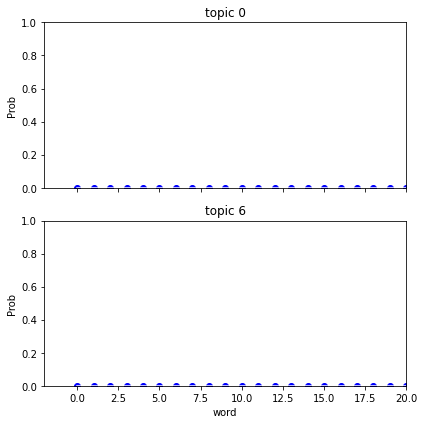

In [47]:
#主题输出
import nltk
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer  
import xlrd


if __name__ == "__main__":
    corpus = all_words
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    word = vectorizer.get_feature_names()   # 所有的特征词，即关键词
#     print(word)    
    analyze = vectorizer.build_analyzer()  
    weight = X.toarray()  
#     print(weight)
    
    import numpy as np
    import lda
    
    # 训练模型
    model = lda.LDA(n_topics = 7, n_iter = 500, random_state = 1)
    model.fit(np.asarray(weight))
    
    # 主题-词分布
    topic_word = model.topic_word_  #生成主题以及主题中词的分布
    #print("topic-word:\n", topic_word)
    
    # 计算topN关键词
    n = 30  
    for i, word_weight in enumerate(topic_word):  
        #print("word_weight:\n", word_weight)
        distIndexArr = np.argsort(word_weight)
        #print("distIndexArr:\n", distIndexArr)
        topN_index = distIndexArr[:-(n+1):-1]
        #print("topN_index:\n", topN_index) # 权重最在的n个
        topN_words = np.array(word)[topN_index]    
        print(u'*Topic {}\n- {}'.format(i, ' '.join(topN_words))) 
    
    #绘制主题-词分布图
    import matplotlib.pyplot as plt  
    f, ax= plt.subplots(2, 1, figsize=(6, 6), sharex=True)  
    for i, k in enumerate([0,6]):         #两个主题
        ax[i].stem(topic_word[k,:], linefmt='b-',  
                   markerfmt='bo', basefmt='w-')  
        ax[i].set_xlim(-2,20)  
        ax[i].set_ylim(0, 1)  
        ax[i].set_ylabel("Prob")  
        ax[i].set_title("topic {}".format(k))  
    ax[1].set_xlabel("word")  
    plt.tight_layout()  
    plt.show()


In [ ]:
#topic2:主题1，新冠病毒于中国武汉爆发，死亡病例猛增
#topic6:主题2，中国因疑似病毒起源地而受到指责，多国对中国发布禁令
#topic4:主题3，新冠病毒席卷全球，影响各国人民，成为世界范围的严重健康问题
#topic0:主题4，中国对疫情反应迅速，采取多种措施抗击疫情
#topic3:主题5，中国积极开展口罩外交，援助各国，共同一致抗疫
#topic5:主题6，美国受疫情影响经济下滑，国家面临政治危机
#topic1:主题7，拜登政府领导抗疫，改善国际关系，修补后疫情期间的世界

In [50]:
# 文档-主题分布  
doc_topic = model.doc_topic_ 
#print("type(doc_topic): {}".format(type(doc_topic)))  
#print("shape: {}".format(doc_topic.shape)) 
label = []   

tweet_clean=pd.read_csv('/Users/kejinglin/Desktop/personal/mydata/tweet_clean.csv',encoding='utf-8')
corpus=[]
a=[]
for i in range(len(tweet_clean['m_content'])):
        a=tweet_clean['m_content'][i]
        corpus.append(a)
        
for i in range(len(corpus)):  
    #print(doc_topic[i])
    topic_most_pr = doc_topic[i].argmax()  
    label.append(topic_most_pr)  
    #print("doc: {} topic: {}".format(i, topic_most_pr))  
#print(label)    
len(label)
name=['result']
label_result=pd.DataFrame(columns=name,data=label)#数据有三列，列名分别为one,two,three
label_result.to_csv('/Users/kejinglin/Desktop/personal/mydata/label_result.csv',encoding='utf-8')

In [38]:
pd.value_counts(label)

4    440
6    436
0    435
7    417
2    415
1    409
3    406
5    405
dtype: int64

In [52]:
#topic为3的推文
corpus_3=[]
a=[]
for i in range(len(tweet_clean['m_content'])):
    a=tweet_clean['m_content'][i]
    if doc_topic[i].argmax() == 0:
        corpus_3.append(a)
name=['topic 3']
corpus_0=pd.DataFrame(columns=name,data=corpus_3)
corpus_0.to_csv('/Users/kejinglin/Desktop/personal/mydata/corpus_3.csv')

# 共词关系/共现网络图

In [131]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import re 
import csv

cut_words = ""

f = open('/Users/kejinglin/Desktop/personal/all-data-key.txt', 'w', encoding='utf-8')
nltk.download('stopwords') 

with open('/Users/kejinglin/Desktop/personal/mydata/clean_content.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader]

for row in rows:
    line = "".join(row)
    line = re.sub('[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', " ", line)
    all_words = []
    seg_list=word_tokenize(line)
    stop_words = set(stopwords.words('english')) 
    for word in seg_list:
        if word not in stop_words:
            all_words.append(word)

    #计算关键词
    c = Counter()
    for x in all_words:
        if len(x)>1 and x != '\r\n':
                c[x] += 1
    #Top5
    output = ""
    for (k,v) in c.most_common(5):
        #print("%s:%d"%(k,v))
        output += k + " "
    
    f.write(output+"\n")
else:
    f.close()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kejinglin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
import pandas as pd
import numpy as np
import codecs
import networkx as nx
import matplotlib.pyplot as plt
import csv
from scipy.sparse import coo_matrix
 
#---------------------------第一步:读取数据-------------------------------
word = [] #记录关键词
f = open("/Users/kejinglin/Desktop/personal/all-data-key.txt", encoding='utf-8')            
line = f.readline()           
while line:
    #print line
    line = line.replace("\n", "") #过滤换行
    line = line.strip('\n') 
    for n in line.split(' '):
        #print n
        if n not in word:
            word.append(n)
    line = f.readline()
f.close()
print(len(word)) #关键词总数


#--------------------------第二步 计算共现矩阵----------------------------
a = np.zeros([2,3])
print(a)

#共现矩阵
#word_vector = np.zeros([len(word),len(word)], dtype='float16') 

#MemoryError：矩阵过大汇报内存错误
#采用coo_matrix函数解决该问题
print(len(word))
#类型<type 'numpy.ndarray'>
word_vector = coo_matrix((len(word),len(word)), dtype=np.int8).toarray() 
print(word_vector.shape)

f = open("/Users/kejinglin/Desktop/personal/all-data-key.txt", encoding='utf-8')  
line = f.readline()           
while line:
    line = line.replace("\n", "") #过滤换行
    line = line.strip('\n') #过滤换行
    nums = line.split(' ')

    #循环遍历关键词所在位置 设置word_vector计数
    i = 0
    j = 0
    while i<len(nums):         #ABCD共现 AB AC AD BC BD CD加1
        j = i + 1
        w1 = nums[i]           #第一个单词
        while j<len(nums):
            w2 = nums[j]       #第二个单词
            #从word数组中找到单词对应的下标
            k = 0
            n1 = 0
            while k<len(word):
                if w1==word[k]:
                    n1 = k
                    break
                k = k +1
            #寻找第二个关键字位置
            k = 0
            n2 = 0
            while k<len(word):
                if w2==word[k]:
                    n2 = k
                    break
                k = k +1
            #重点: 词频矩阵赋值 只计算上三角
            if n1<=n2:
                word_vector[n1][n2] = word_vector[n1][n2] + 1
            else:
                word_vector[n2][n1] = word_vector[n2][n1] + 1
            #print n1, n2, w1, w2
            j = j + 1
        i = i + 1
    #读取新内容
    line = f.readline()
f.close()


#--------------------------第三步  TXT文件写入--------------------------
res = open("/Users/kejinglin/Desktop/personal/word_word_weight.txt", "a+", encoding='utf-8')
i = 0
while i<len(word):
    w1 = word[i]
    j = 0
    while j<len(word):
        w2 = word[j]
        #判断两个词是否共现 共现&词频不为0的写入文件
        if word_vector[i][j]>0:
            #print w1 +" " + w2 + " "+ str(int(word_vector[i][j]))
            res.write(w1 +" " + w2 + " "+ str(int(word_vector[i][j]))  +  "\n")
        j = j + 1
    i = i + 1
res.close()

#--------------------------第四步  CSV文件写入--------------------------
c = open("/Users/kejinglin/Desktop/personal/word-word-weight.csv","w", encoding='utf-8', newline='')    #解决空行
#c.write(codecs.BOM_UTF8)                                 #防止乱码
writer = csv.writer(c)                                    #写入对象
writer.writerow(['Word1', 'Word2', 'Weight'])

i = 0
while i<len(word):
    w1 = word[i]
    j = 0 
    while j<len(word):
        w2 = word[j]
        #判断两个词是否共现 共现词频不为0的写入文件
        if word_vector[i][j]>0:
            #写入文件
            templist = []
            templist.append(w1)
            templist.append(w2)
            templist.append(str(int(word_vector[i][j])))
            #print templist
            writer.writerow(templist)
        j = j + 1
    i = i + 1
c.close()

4249
[[0. 0. 0.]
 [0. 0. 0.]]
4249
(4249, 4249)


In [ ]:
#test
import networkx as nx
import matplotlib.pyplot as plt
 
#定义有向图
DG = nx.Graph() 
#添加五个节点(列表)
DG.add_nodes_from(['A', 'B', 'C', 'D','E'])
print(DG.nodes())
#添加边(列表)
DG.add_edge('A', 'B', weight=5)
DG.add_edge('A', 'C', weight=2)
DG.add_edge('A', 'D', weight=1)
DG.add_edge('B', 'C', weight=1)
DG.add_edge('B', 'D', weight=1)
DG.add_edge('C', 'D', weight=1)
DG.add_edge('E', 'D', weight=1)
# DG.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B','C'),('B','D'),('C','D')])
print(DG.edges())
#绘制图形 设置节点名显示\节点大小\节点颜色
colors = ['red', 'green', 'blue', 'yellow','black']
nx.draw(DG,with_labels=True, node_size=900, node_color = colors)
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
 
#定义有向图
DG = nx.Graph() 
#添加五个节点(列表)
DG.add_nodes_from(['COVID', 'China', 'virus', 'blame','Communist','pendamic','media','President','Trump'])
print(DG.nodes())
#添加边(列表)
DG.add_edge('COVID', 'China', weight=4)
DG.add_edge('China', 'virus', weight=3)
DG.add_edge('China', 'blame', weight=2)
DG.add_edge('China', 'Communist', weight=2)
DG.add_edge('China', 'pendamic', weight=2)
DG.add_edge('China', 'media', weight=2)
DG.add_edge('President', 'Trump', weight=2)
# DG.add_edges_from([('A', 'B'), ('B', 'C'), ('B', 'D'), ('B','E'),('B','F'),('B','G'),('H','I')])
print(DG.edges())
#绘制图形 设置节点名显示\节点大小\节点颜色
colors = ['red', 'green', 'blue', 'yellow','Red','Red','Red','orange','Red']
nx.draw(DG,with_labels=True, node_size=900, node_color = colors)
plt.show()

# Texblob情感分析

In [21]:
from textblob import TextBlob
import re
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [25]:
# We create a column with the result of the analysis:
tweet['SA'] = np.array([ analize_sentiment(tweet) for tweet in tweet['m_content'] ])
# We display the updated dataframe with the new column:
display(tweet.head(10))

,u_nickname,u_url,m_content,m_content_url,m_content_id,m_images,m_videos,r_comment_num,g_publish_time,r_like_num,r_trans_num,verified,u_id,u_desc,u_fans,u_follow,u_login_time,u_area,SA
0,Michael Johns,https://twitter.com/michaeljohns,"""...the Chinese government deliberately covere...",NaN,1256623049652277254,NaN,NaN,53,2020-05-03 00:34:16,449,409,1,14828860,National Tea Party movement co-founder and lea...,196393,112295,2008-05-19 13:06:21,"New Jersey, USA",-1
1,Daily Caller,https://twitter.com/DailyCaller,"""70% of the active ingredients in our pharmace...",NaN,1331432568869318660,['http://pbs.twimg.com/amplify_video_thumb/133...,https://twitter.com/DailyCaller/status/1331432...,17,2020-11-25 11:00:35,510,156,1,39308549,The journalists who love America.,736466,7550,2009-05-12 02:31:37,"Washington, DC",1
2,The White House 45 Archived,https://twitter.com/WhiteHouse45,"""75 years after the end of World War II and th...",NaN,1308424389973680128,['http://pbs.twimg.com/amplify_video_thumb/130...,https://twitter.com/WhiteHouse/status/13084243...,616,2020-09-22 23:14:18,3661,963,1,822215673812119553,This is an archive of a Trump Administration a...,26490485,11,2017-01-20 06:54:27,"Washington, D.C.",1
3,Senator John Cornyn,https://twitter.com/JohnCornyn,"""A University of Southampton study suggests th...",NaN,1247121007749607429,NaN,NaN,231,2020-04-06 19:18:47,509,218,1,13218102,"Mainly news I find interesting, pics, and opin...",294161,11996,2008-02-08 03:52:55,"Austin, Texas",0
4,Paul Joseph Watson,https://twitter.com/PrisonPlanet,"""A study published in March indicated that if ...",NaN,1240429794057236483,NaN,NaN,224,2020-03-19 08:08:03,11594,3385,1,18643437,"""Watson is a brilliant polemicist."" The Specta...",1108941,770,2009-01-06 04:04:23,London,-1
5,Kai Kupferschmidt,https://twitter.com/kakape,"""A year ago today, fewer than 1500 cases of #C...",NaN,1353753411322343424,NaN,NaN,6,2021-01-26 01:15:39,253,137,1,45586617,science journalist. molecular biologist. curio...,120926,1640,2009-06-08 23:17:36,"Berlin, Germany",0
6,Ivan Watson,https://twitter.com/IvanCNN,"""Academic papers about tracing the origin of t...",NaN,1249359155187482625,NaN,NaN,57,2020-04-12 23:30:09,871,853,1,85243004,CNN correspondent based in Hong Kong.,96964,365,2009-10-26 13:08:15,Hong Kong,-1
7,"ɪᴀɴ ᴍ. ᴍᴀᴄᴋᴀʏ, ᴘʜᴅ",https://twitter.com/MackayIM,"""According to the government data seen by the ...",NaN,1238264817007210496,NaN,NaN,36,2020-03-13 08:45:12,520,349,1,1352962327,virologist. scientist. husband. dad. reader. w...,114957,4754,2013-04-15 06:49:08,"Brisbane, Australia",1
8,The Lowy Institute,https://twitter.com/LowyInstitute,"""After COVID we can also see the majority of A...",NaN,1275753789031452672,NaN,NaN,27,2020-06-24 19:33:00,588,560,1,83521919,The Lowy Institute is a leading global think t...,65538,1832,2009-10-19 12:28:41,"Sydney, Australia",1
9,NTD News,https://twitter.com/news_ntd,"""All the doors are barricaded...All the houses...",NaN,1229974360171143169,['http://pbs.twimg.com/ext_tw_video_thumb/1229...,https://twitter.com/news_ntd/status/1229974360...,65,2020-02-19 11:41:53,590,595,0,1060573081935249409,Your independent voice in TV news—bringing bac...,68230,33,2018-11-09 00:41:42,"New York, NY",-1


In [26]:
num_pos=0
for sa in tweet['SA']:
    if int(sa) > 0:
        num_pos=num_pos+1
num_pos

5852

In [27]:
num_neg=0
for sa in tweet['SA']:
    if int(sa) < 0:
        num_neg=num_neg+1
num_neg

3286

In [28]:
num_neu=0
for sa in tweet['SA']:
    if int(sa) == 0:
        num_neu=num_neu+1
num_neu

3427

In [30]:
print("Percentage of positive tweets: {}%".format(num_pos*100/len(tweet['m_content'])))
print("Percentage of neutral tweets: {}%".format(num_neg*100/len(tweet['m_content'])))
print("Percentage de negative tweets: {}%".format(num_neu*100/len(tweet['m_content'])))

Percentage of positive tweets: 46.57381615598886%
Percentage of neutral tweets: 26.152009550338242%
Percentage de negative tweets: 27.2741742936729%
